# Time series with Python

Let's start with generating a random time series with `pandas` and plotting it (make it ~1000 item long)

In [66]:
# hints : you can use date_range
index = pd.date_range('1/1/2019', periods=4, freq='D')
pd.Series(range(4),index=index)

2019-01-01    0
2019-01-02    1
2019-01-03    2
2019-01-04    3
Freq: D, dtype: int64

<BarContainer object of 41 artists>

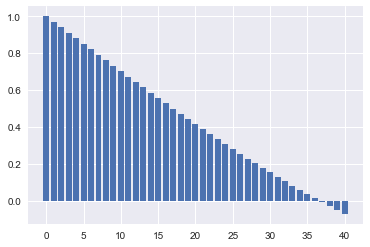

In [211]:
import numpy as np
import pandas as pd
import statsmodels.tsa as tsa
import matplotlib.pyplot as plt
N=100
x = pd.Series(range(N)+np.random.rand(N), 
              index= pd.date_range("01/01/2018",periods=N, freq="M"))
acf = tsa.stattools.acf(x)

plt.bar(range(len(acf)),acf)

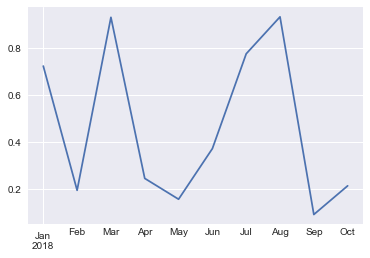

In [130]:
x.plot()

## Dow Jones data
Let us continue with a short history of Dow Jones index http://bit.ly/1QXsMuJ

Import the data into Python Series object converting the index to a date. Explore the content (the types of the values/indexes etc) of the data set with `head`,`info` etc. Plot it.

In [14]:
# Here is an example how to convert the weekly dates format to datetime
import datetime
d = "2013-W26"
r = datetime.datetime.strptime(d + '-1', "%Y-W%W-%w")
print(r)

2013-07-01 00:00:00


Week
1971-07-11    890.19
1971-07-18    901.80
1971-07-25    888.51
1971-08-01    887.78
1971-08-08    858.43
dtype: float64

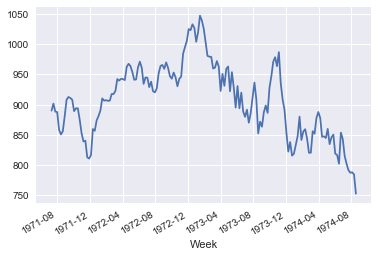

In [176]:
x = pd.read_csv("data/weekly-closings-of-the-dowjones-.csv",sep=";")
# Error : 
#x["Week"].apply(lambda d: datetime.datetime.strptime(d + '-1', "%Y-W%W-%w"))
# look at the line 162 of x["Week"]
x = x.iloc[0:162,]
index=x["Week"].apply(lambda d: datetime.datetime.strptime(d + '-0', "%Y-W%W-%w"))
pd.Series(x.iloc[:,1].values,index=index).plot()
pd.Series(x.iloc[:,1].values,index=index).head()

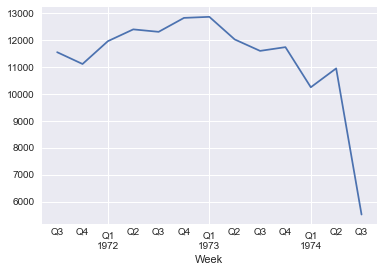

In [171]:
pd.Series(x.iloc[:,1].values,index=index).resample("Q").sum().plot()

## Airline passengers
Use the dataset http://bit.ly/1bKs2mG to study the series by decomposing it into a trend, seasons and remainder. Analyse it using visualisations and ACF statistics

Start by exploring the content of the data and prepare a time series

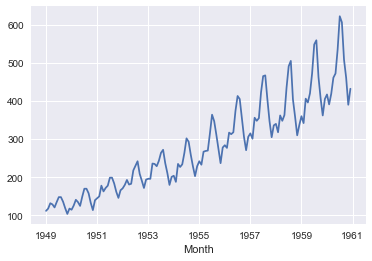

In [234]:
x = pd.read_csv("data/international-airline-passengers.csv",sep=",")
x = x.iloc[0:(len(x["Month"])-1),:]
index=x["Month"].apply(lambda d: datetime.datetime.strptime(d + '-01', "%Y-%m-%d"))
passengers = pd.Series(x.iloc[:,1].values,index=index,name="value")
passengers.plot()

Visualise it.
Add a rolling mean to see local trends `rolling_mean()`

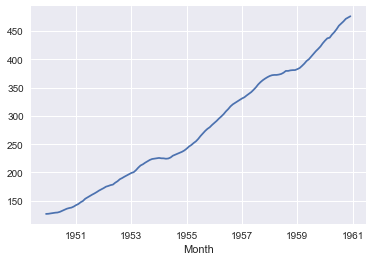

In [212]:
passengers.rolling(12).mean().plot()

Explore the autocorrelations. What patterns do you see?

<BarContainer object of 41 artists>

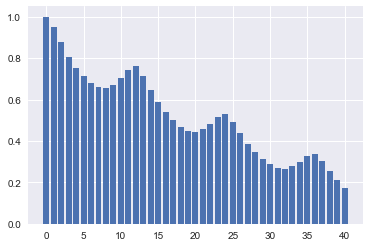

In [235]:
import statsmodels.tsa as tsa
import matplotlib.pyplot as plt
acf = tsa.stattools.acf(passengers)
plt.bar(range(len(acf)),acf)

0.9.0


<BarContainer object of 41 artists>

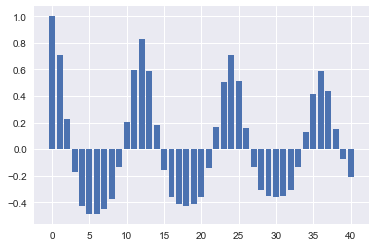

In [236]:
de_pass = passengers.subtract(passengers.rolling(12).mean())
#de_pass.plot()
import statsmodels
print(statsmodels.__version__)
acf = tsa.stattools.acf(de_pass[12:])
acf
plt.bar(range(len(acf)),acf)

Make some seasonal plots based on the information you have discovered with ACF

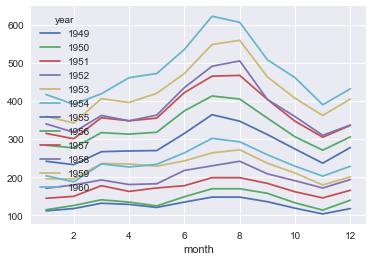

In [274]:
fpass = pd.DataFrame({'value':passengers.values, 'month':passengers.index.month,
                     'year': passengers.index.year})
fpass
pv = pd.pivot_table(fpass, index=fpass.month, 
                    columns=fpass.year,
                    values='value', aggfunc='sum')
pv.plot()

Make some additional lag plots to study the patterns if any

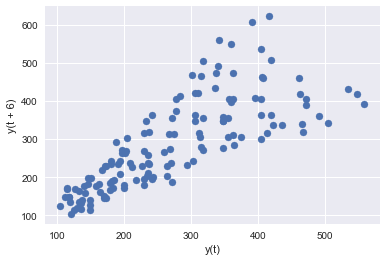

In [281]:
from pandas.plotting import lag_plot
lag_plot(passengers,6)

Test a simple decomposition with `tsa.seasonal_decompose` from `statsmodels` module. Plot the results.

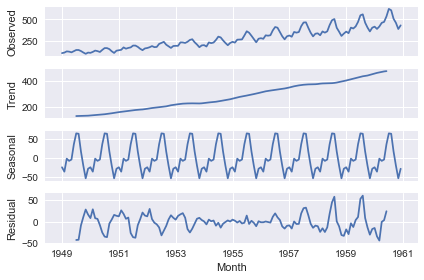

In [282]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(passengers,freq=12,model="additive")

fig = res.plot()

Split the sample into test/train dataset and check simple prediction algorithms as discussed during the lecture (naive, seasonal naive, etc)

Implement your own methods for the metrics RMSE and MAPE.

Compare the output of the algorithms

Check the residuals for any patterns (plot it)

Check the residuals for autocorrellation

<BarContainer object of 41 artists>

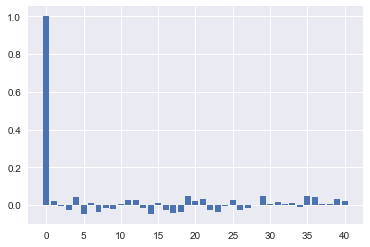

In [125]:
%matplotlib inline
import statsmodels.tsa as tsa
import matplotlib.pyplot as plt
acf = tsa.stattools.acf(x)
plt.bar(range(len(acf)), tsa.stattools.acf(x))

Do predictions work better with differencing the series (diff)?

Test the exponential smoothing algorithm. Split Test/Train

In [279]:
#statsmodels.tsa.holtwinters.ExponentialSmoothing

Plot the results

## London cycling data

Download the data on London cycling : https://opendata.camden.gov.uk/api/views/hwk2-xvrv/rows.csv?accessType=DOWNLOAD

Choose one location and analyse it
* general inspection
* plot different views
* autocorrelation check
* split into seasonalities
* try one a several basic prediction models for a base line
* try exponential smoothing models and compare them with the base line
* check the residuals and repeat modelling if needed
* check the results for a rolling forecast

Explore different location sites. How similar are they? Can it be used for any insights?